### Lending club is a well-known fintech company. Learning how does Lending club make decisions can help us understand loan business better.  Determining a proper interest rate for each loan can be one of the core competences for a fintech company. However, we can know the way Lending club determines their interest rate. We can get some insights from Lending club's loan data set to help us make better decisions. 

data resource: https://www.lendingclub.com/info/download-data.action

In [1]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math
from scipy import stats
from collections import Counter
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
# read data sets
loan_1 = pd.read_csv('./lending_club_loan_data_2018/LoanStats_2018Q1.csv', header=1)
loan_2 = pd.read_csv('./lending_club_loan_data_2018/LoanStats_2018Q2.csv', header=1)
loan_3 = pd.read_csv('./lending_club_loan_data_2018/LoanStats_2018Q3.csv', header=1)
loan_4 = pd.read_csv('./lending_club_loan_data_2018/LoanStats_2018Q4.csv', header=1)

C:\TEXTBOOK\Python\anoconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# concat data sets together
loan = pd.concat([loan_1, loan_2, loan_3, loan_4])

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,25000.0,25000.0,25000.0,60 months,21.85%,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,Mar-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,1.0,22.0,NaN,7.0,0.0,8657.0,98.4%,16.0,w,21614.89,21614.89,8887.86,8887.86,3385.11,5502.75,0.0,0.0,0.0,Apr-2019,688.35,May-2019,Apr-2019,0.0,23.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,74795.0,0.0,2.0,0.0,2.0,16.0,8382.0,82.0,0.0,0.0,3237.0,90.0,8800.0,4.0,3.0,3.0,2.0,10685.0,63.0,98.1,0.0,0.0,69.0,126.0,72.0,16.0,2.0,126.0,NaN,0.0,22.0,2.0,1.0,3.0,1.0,1.0,4.0,3.0,9.0,3.0,7.0,0.0,0.0,1.0,0.0,75.0,100.0,0.0,0.0,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,60 months,12.61%,225.54,C,C1,Supervisor,4 years,MORTGAGE,80000.0,Source Verified,Mar-2018,Current,n,NaN,NaN,home_improvement,Home improvement,306xx,GA,7.59,0.0,Oct-2006,1.0,27.0,NaN,17.0,0.0,10710.0,37.7%,23.0,w,8467.98,8467.98,2692.47,2692.47,1532.02,1160.45,0.0,0.0,0.0,Apr-2019,225.54,May-2019,Apr-2019,0.0,27.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,299196.0,1.0,0.0,0.0,1.0,18.0,0.0,NaN,6.0,12.0,1785.0,38.0,28400.0,2.0,0.0,4.0,13.0,17600.0,4193.0,66.5,0.0,0.0,133.0,137.0,4.0,4.0,2.0,4.0,27.0,4.0,27.0,2.0,10.0,14.0,10.0,11.0,3.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,6.0,91.3,40.0,0.0,0.0,388400.0,10710.0,12500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,11200.0,11200.0,11200.0,60 months,30.79%,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,Mar-2018,Current,n,NaN,NaN,medical,Me

In [5]:
print("The shape of loan data set in 2018 is : ", loan.shape)

The shape of loan data set in 2018 is :  (495250, 144)


## Missing value

In [6]:
missing_df = loan.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_percentage'] = missing_df['missing_count']/loan.shape[0]
missing_df = missing_df[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by = 'missing_percentage')

Text(0.5,1,'Number of missing value in each column')

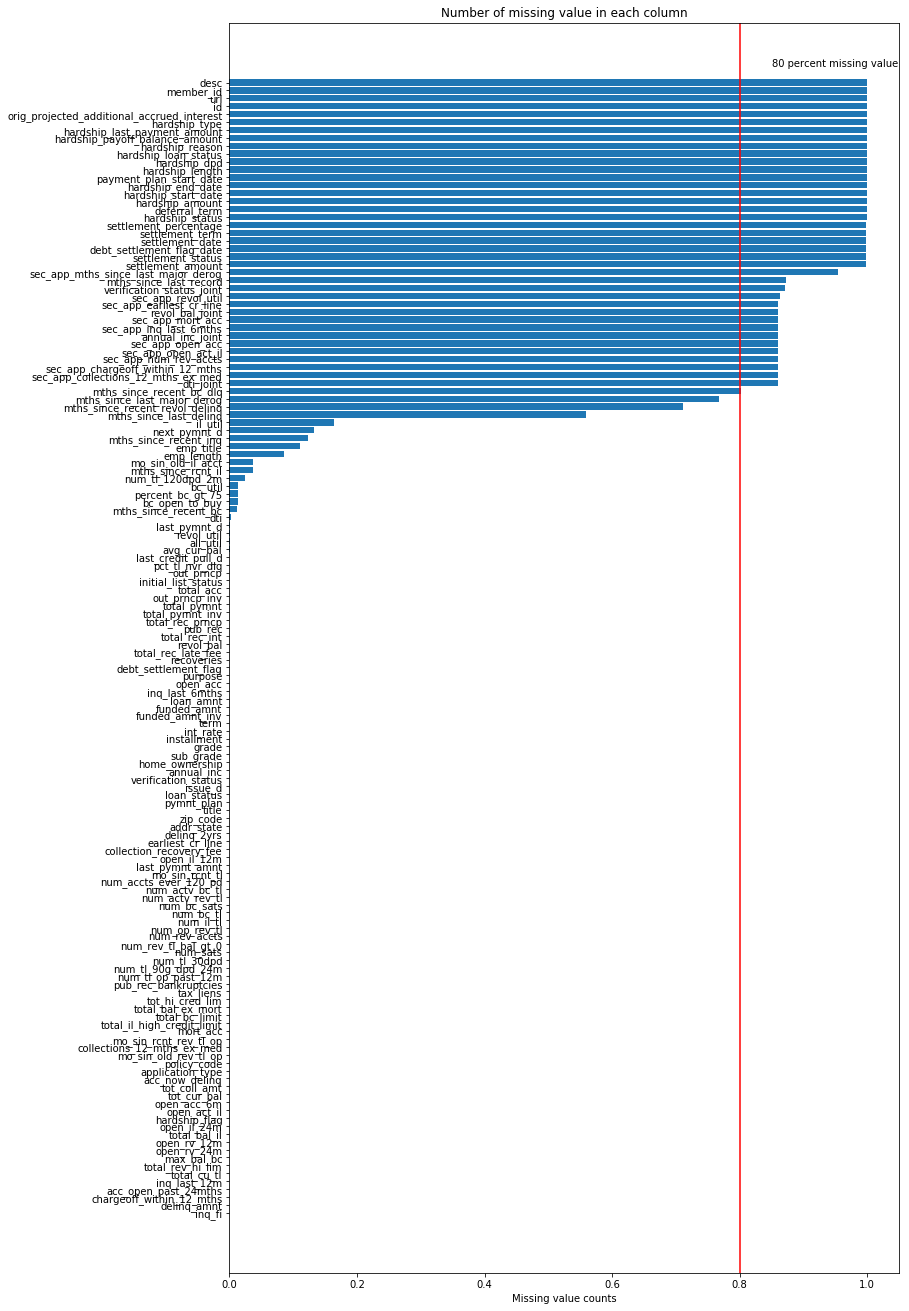

In [7]:
fig, ax = plt.subplots(figsize=(12,23))
ax.barh(missing_df.column_name, missing_df.missing_percentage)
ax.axvline(x = 0.8, color = 'red')
plt.annotate('80 percent missing value', xy=(0.85, missing_df.shape[0]+1), color='black')
plt.xlabel('Missing value counts')
plt.title('Number of missing value in each column')

### 80 percent missing value

In [8]:
# features with more than 99 percent missing value
most_missing_columns_80 = missing_df[missing_df['missing_percentage'] >= 0.80]['column_name']

In [9]:
# take a look at column names
most_missing_columns_80

86                       mths_since_recent_bc_dlq
54                                      dti_joint
120            sec_app_collections_12_mths_ex_med
119              sec_app_chargeoff_within_12_mths
118                         sec_app_num_rev_accts
117                           sec_app_open_act_il
115                              sec_app_open_acc
53                               annual_inc_joint
113                        sec_app_inq_last_6mths
114                              sec_app_mort_acc
111                               revol_bal_joint
112                      sec_app_earliest_cr_line
116                            sec_app_revol_util
55                      verification_status_joint
29                         mths_since_last_record
121           sec_app_mths_since_last_major_derog
141                             settlement_amount
139                             settlement_status
138                     debt_settlement_flag_date
140                               settlement_date


##### Joint features
NA suggest that the application is only made by one borrower. Thus, one simple yet very reasonable way to impute these features is to replace NA by their corresponding non-joint features, e.g. 'annual_inc','verification_status',etc.

In [10]:
joint_features = ['annual_inc','verification_status','dti','revol_bal']

for f in joint_features:
    # fill na by another column
    loan[f + '_new'] = loan[f + '_joint'].fillna(loan[f], inplace=False)
    # check missing value after imputation
    #print (f + '_new', ':', loan[f + '_new'].isnull().sum())

In [11]:
# delete joint and non-joint features
loan = loan.drop(joint_features + 
                 [x + '_joint' for x in joint_features], 
                 axis = 1)

##### Secondary applicant features
Use the average of fist and second applicants to represent related numerical features.For categorical feature **sec_app_earliest_cr_line**, take the earlier year of first and second applicant 

In [12]:
# remove 'revol_util'
loan.drop(['revol_util','sec_app_revol_util'], axis=1, inplace=True)
first_features = [
     'chargeoff_within_12_mths',
     'collections_12_mths_ex_med',
     'inq_last_6mths',
     'mort_acc',
     'num_rev_accts',
     'open_acc',
     'open_act_il']

first_categorical_features = 'earliest_cr_line'

# handle numerical, use 0 to impute na
for f in first_features:
    loan['sec_app_' + f].fillna(loan[f], inplace=True)
    loan[f + '_new'] = (loan['sec_app_' + f] + loan[f]) / 2

# handle categorical
loan['earliest_cr_line'].fillna(loan['earliest_cr_line'].mode().values[0], inplace = True)
loan['sec_app_earliest_cr_line'].fillna(loan['earliest_cr_line'], inplace=True)

loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x.split('-')[1])
loan['sec_app_earliest_cr_line'] = loan['sec_app_earliest_cr_line'].apply(lambda x: x.split('-')[1])

loan['earliest_cr_line_new'] = loan[['earliest_cr_line','sec_app_earliest_cr_line']].min(axis=1)

loan['earliest_cr_line_new'] = loan['earliest_cr_line_new'].apply(lambda x: str(int(x/10)*10))

In [13]:
# delete related columns
for f in first_features + ['earliest_cr_line']:
    loan.drop([f, 'sec_app_'+f], axis=1, inplace=True)

##### Hardship program
Many columns relate to a program Called Hardship Program. These columns are only available when people applied for this program. I decide to delete all the features relate to Hardship Program and create a new feature indicating whether this loan joined the program or not.

In [14]:
hardship = missing_df[missing_df['column_name'].str.contains('hardship')]

In [15]:
hardship['column_name'].values

array(['hardship_flag', 'hardship_status', 'hardship_amount',
       'hardship_start_date', 'hardship_end_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status', 'hardship_reason',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'hardship_type'], dtype=object)

In [16]:
# create a new feature "is_hardship"
loan['is_hardship'] = loan['hardship_status'].isna()

In [17]:
# delete hardship related columns
loan = loan.drop(hardship['column_name'].values, axis = 1)

##### Settlement program
If people have problem making their payment, they can reach out to a debe settlement company.
Create a new feature indicating whether this loan joined the program or not, delete original features

In [18]:
settlement = missing_df[missing_df['column_name'].str.contains('settlement')]

In [19]:
# create a new feature "is_settlement"
loan['is_settlement'] = loan['settlement_amount'].isna()

In [20]:
# delete settlement related columns
loan = loan.drop(settlement['column_name'].values, axis = 1)

In [21]:
# delete other features
other_80 = [x for x in most_missing_columns_80.values
                 if 'hardship' not in x and 
                     'sec_app_' not in x and 
                     '_joint' not in x and 
                     'settlement' not in x] 
other_80
loan = loan.drop(other_80, axis = 1)

In [22]:
## for month type value

# replace by 0
loan['mths_since_last_delinq'].fillna(0, inplace=True)
loan['mo_sin_old_il_acct'].fillna(0, inplace=True)

# replace by median
for f in ['mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq']:
    loan[f].fillna(np.nanmedian(loan[f]), inplace=True)

# remove 
loan.drop('mths_since_recent_revol_delinq', axis=1, inplace=True)

# replace by other
loan['last_pymnt_d'].fillna('Other', inplace=True)
loan['next_pymnt_d'].fillna('Other', inplace=True)


In [23]:
# drop 'mths_since_last_major_derog' related features
loan.drop(['mths_since_last_major_derog', 
           'sec_app_mths_since_last_major_derog'], 
          axis = 1, 
          inplace=True)

In [24]:
# impute by median
for f in ['pct_tl_nvr_dlq', 'all_util', 'avg_cur_bal', 'bc_open_to_buy','bc_util','percent_bc_gt_75']:
    loan[f].fillna(
        np.nanmedian(loan[f]), 
        inplace=True)

In [25]:
# impute by majority
loan['last_credit_pull_d'].fillna(
    loan['last_credit_pull_d'].value_counts().index[0], 
    inplace=True)

In [26]:
# deal with emp_title

# impute with Other
loan['emp_title'].fillna('Other', inplace=True)
# remove space in the beginning and end
loan['emp_title'] = loan['emp_title'].apply(lambda x: x.strip())
# choose the last word as the general title
loan['emp_title'] = loan['emp_title'].apply(lambda x: x.split(' ')[-1].lower() if ' ' in x else x.lower())

# choose top 20 in order to contain half of the variance
top_20_title = loan['emp_title'].value_counts()[:20].index.tolist()
loan['emp_title'] = loan['emp_title'].apply(lambda x: x if x in top_20_title else 'minority')

In [27]:
# create a new feature il_util_2
loan['il_util_2'] = loan['total_bal_il'] / loan['total_il_high_credit_limit'] * 100

# remove il_util
loan.drop(['il_util'], axis=1, inplace=True)

# impute with 0
loan['il_util_2'].fillna(0, inplace=True)

In [28]:
# deal with emp_length
loan['emp_length'].fillna('Other', inplace=True)
# deal with num_tl_120dpd_2m
loan['num_tl_120dpd_2m'].fillna(0, inplace=True)

In [29]:
loan.shape

(495250, 101)

In [30]:
## right now, number of rows having Na is very small, delete them
loan = loan.dropna()

In [31]:
loan_1.shape

(107866, 144)

In [32]:
def get_num_features(df):
    
    res = []
    for f in df:
        if np.issubdtype(df[f].dtype, np.number):
            res.append(f)
    
    return res

numerical_features = get_num_features(loan)

In [33]:
## remove outliers
def detect_outlier(data):
    tmp = data.copy()
    q1, q3 = np.percentile(tmp, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    has_outlier = np.max(tmp) > upper_bound or np.min(tmp) < lower_bound
    if not has_outlier:
        return tmp
    upper_idx = np.where(tmp > upper_bound)
    lower_idx = np.where(tmp < lower_bound)
    tmp[upper_idx] = upper_bound
    tmp[lower_idx] = lower_bound
    
    if np.max(tmp) <= upper_bound and np.min(tmp) >= lower_bound:
        print ("Done with handling outliers")
    else:
        print ("Warning!! Fail handling outliers")
    
    return tmp

In [34]:
for f in numerical_features:
    loan[f] = detect_outlier(loan[f].values)

Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling outliers
Done with handling o

In [35]:
loan.to_csv('./loan_cleaned.csv', encoding='utf-8', index=False)

## Exploratory data analysis

In [36]:
loan_cleaned = pd.read_csv('./loan_cleaned.csv')

In [37]:
loan_cleaned.shape

(495242, 101)

In [38]:
# remove features Only has 1 value
one_value_features = []

for f in loan_cleaned:
    if len(loan_cleaned[f].value_counts()) == 1:
        one_value_features.append(f)

loan_cleaned.drop(one_value_features, axis=1, inplace=True)

In [39]:
loan_cleaned.shape

(495242, 84)

In [40]:
# Convert string to float
loan_cleaned['int_rate'] = loan_cleaned['int_rate'].apply(lambda x: float(x[:-1]))

In [41]:
# Correlations
# get correlation of all numerical variable
correlation = loan_cleaned.select_dtypes(include = [np.number]).corr()
print(correlation['int_rate'].sort_values(ascending = False))

int_rate                      1.000000
total_rec_int                 0.410132
all_util                      0.326937
bc_util                       0.320156
percent_bc_gt_75              0.314522
dti_new                       0.197661
inq_last_12m                  0.128143
inq_fi                        0.124873
open_il_24m                   0.124215
inq_last_6mths_new            0.121611
open_il_12m                   0.121526
acc_open_past_24mths          0.115003
num_tl_op_past_12m            0.113485
il_util_2                     0.108123
open_acc_6m                   0.090199
earliest_cr_line_new          0.085387
open_rv_24m                   0.076495
num_actv_rev_tl               0.075214
num_rev_tl_bal_gt_0           0.071536
open_rv_12m                   0.070518
open_act_il_new               0.053402
mths_since_last_delinq        0.051855
total_bal_il                  0.049569
installment                   0.046880
total_bal_ex_mort             0.030889
last_pymnt_amnt          

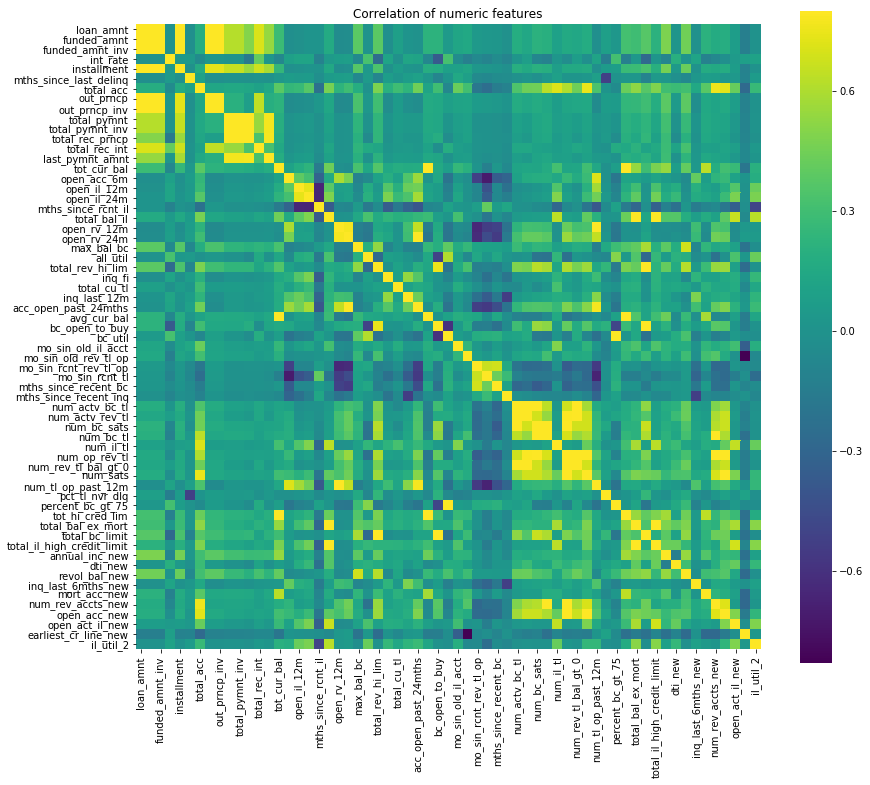

In [42]:
# heatmap in seaborn
plt.figure(figsize = (14,12))
plt.title('Correlation of numeric features',size=12)
sns.heatmap(correlation, square = True, vmax = 0.8, cmap = 'viridis')
plt.show()

In [43]:
# Categorical features
for f in loan_cleaned:
    if loan_cleaned[f].dtype != 'float64' :
        print (f, len(loan_cleaned[f].value_counts()))

term 2
grade 7
sub_grade 35
emp_title 21
emp_length 12
home_ownership 4
issue_d 12
loan_status 7
pymnt_plan 2
purpose 13
title 12
zip_code 897
addr_state 50
initial_list_status 2
last_pymnt_d 17
next_pymnt_d 4
last_credit_pull_d 18
application_type 2
verification_status_new 3
earliest_cr_line_new 8
is_hardship 2
is_settlement 2


In [44]:
# decrease levels in zip_code
loan_cleaned['zip_code'] = loan_cleaned['zip_code'].apply(lambda x: x[0]+x[-1])
# delete sub_grade
loan_cleaned.drop(['sub_grade'], axis=1, inplace=True)
# delete addr_state
loan_cleaned.drop(['addr_state'], axis=1, inplace=True)

In [45]:
loan_cleaned.shape

(495242, 82)

In [46]:
# get dummy
# extract categorical variables
dummy_columns = [x for x in loan_cleaned if loan_cleaned[x].dtype != 'float64']
# before dummy
print (loan_cleaned.shape)
# get dummies
loan_cleaned = pd.get_dummies(loan_cleaned, columns = dummy_columns)
# after dummy
print (loan_cleaned.shape)

(495242, 82)
(495242, 222)


## Split train and test

In [47]:
from sklearn.model_selection import train_test_split
x = loan_cleaned[loan_cleaned.columns.difference(['int_rate'])]
y = loan_cleaned['int_rate'].values

# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 10)

In [48]:
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()
# transform training set
x_train_std = scaler.fit_transform(x_train)
# the same transform for test set
x_test_std = scaler.transform(x_test)

C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [50]:
#pd.DataFrame(x_train_std).to_csv('./x_train_std.csv', encoding='utf-8', index=False, header=None)
#pd.DataFrame(y_train).to_csv('./y_train.csv', encoding='utf-8', index=False, header=None)

In [51]:
#x_train_std = pd.read_csv('./x_train_std.csv')
#y_train = pd.read_csv('./y_train.csv')

In [52]:
#x_train_std.shape

(396192, 221)

#### Ridge regression

In [53]:
from sklearn.linear_model import RidgeCV

alphas_ridge = np.arange(1e-6, 1e-3, 5e-6)

# initialize a model object
RidgeReg = RidgeCV(alphas = alphas_ridge, store_cv_values=True)

# train model
RidgeReg.fit(x_train_std, y_train)

# get optimal alpha 
optimal_alpha_ridge = RidgeReg.alpha_

print ("The optimal value of alpha in Ridge Regression: ", optimal_alpha_ridge)

The optimal value of alpha in Ridge Regression:  0.000996


In [58]:
RidgeReg.coef_[0]

array([ 1.38852095e-02,  4.05137581e-02,  8.45749138e-03,  6.95264374e-03,
       -6.95264374e-03, -7.90111558e-02, -2.72845153e-02,  2.36265307e-02,
        1.14360924e-01, -2.01310385e-04,  1.60411869e-03, -1.11837871e-05,
        3.20159397e-03,  6.89459612e-03,  2.47823360e-03, -4.88580586e-03,
       -2.18289936e-03,  1.50917814e-03, -1.62446743e-03, -8.18350760e-04,
       -2.16254604e-03, -6.86452346e-04,  4.69985534e-05, -9.02482308e-04,
       -4.94810869e-04, -8.65847942e-04, -2.18753872e-03,  2.83774544e-03,
        4.81198769e-03, -1.41941503e-03,  2.96045101e-03,  1.79243740e-04,
       -2.85995565e-03,  2.90605141e-03, -6.07087219e-04, -4.02948871e-03,
        3.32942465e-04,  2.68017230e-03,  1.50069627e-03, -5.52902260e-04,
       -4.94413776e-04,  3.04221699e-04, -1.81829245e-03, -1.64500251e-03,
       -1.11144927e-03, -2.20641473e-03, -6.12236196e-04,  6.11322466e-04,
       -8.03137897e-04, -2.07164430e-03, -1.09621631e+01,  2.05217313e+01,
       -2.32729512e+00, -

In [62]:
coef = pd.Series(RidgeReg.coef_, index = x.columns)
importance_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.figure(figsize=(12,8))
importance_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Regression")
plt.show()

ValueError: Length of passed values is 1, index implies 221

#### GradientBoostingRegressor

In [61]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# initialize model
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, )

# fit model
gb.fit(x_train_std, y_train)

# predict
y_pred = gb.predict(x_train_std)

# rmse
np.sqrt(np.mean((y_pred-y_train)**2))

C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unable to coerce to Series, length must be 1: given 396192

In [ ]:
featureImportance = gb.feature_importances_
features = pd.DataFrame()
features['features'] = x_train.columns.values
features['importance'] = featureImportance
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h", color="#34495e")
plt.title("Feature Importance in Gradient Boosting", fontsize=20)
plt.show()